In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [43]:
SAVE_OUTPUTS = True
# SAVE_OUTPUTS = False

## make TAble 1 into figure

In [44]:
## Use only some models for figure 

In [45]:
Select_Models_List = ['#Siblings Baseline', 'Source Baseline', 'Phenotype Baseline',
                      "No Text" ,
       # 'Max Phenotype frequency Baseline',
                      'Logistic Regression',
       # 'Catboost without Text',
                      'Random Forest', 
                      # 'CatBoost-base-NoImpute',  'CatBoost-NoImpute',
                      # 'HistGradientBoosting', # sklearn-HistGradientBoosting
                      'CatBoost']

In [46]:
# fpath = "Table-1-Known disease subtype models evaluation.csv"
fpath = "./outputs/S3-Table-Known disease subtype models evaluation.csv"

In [47]:
rocauc_data = pd.read_csv(fpath)
rocauc_data = rocauc_data.loc[rocauc_data['Unnamed: 0'].isin(Select_Models_List)].dropna(axis=0).reset_index(drop=True)
data = rocauc_data.copy()

# Extracting only the relevant columns for ROCAUC Mean and SD
rocauc_data = rocauc_data[['Unnamed: 0', 'ROCAUC Mean', 'ROCAUC SD']].copy()
rocauc_data.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)

rocauc_data

,Model,ROCAUC Mean,ROCAUC SD
0,#Siblings Baseline,52.35,0.52
1,Source Baseline,55.86,0.55
2,Phenotype Baseline,66.42,0.42
3,Logistic Regression,80.83,0.70
4,No Text,85.80,0.51
5,Random Forest,86.45,0.68
6,CatBoost,89.47,0.47


In [48]:
rocauc_data.Model.values

array(['#Siblings Baseline', 'Source Baseline', 'Phenotype Baseline',
       'Logistic Regression', 'No Text', 'Random Forest', 'CatBoost'],
      dtype=object)

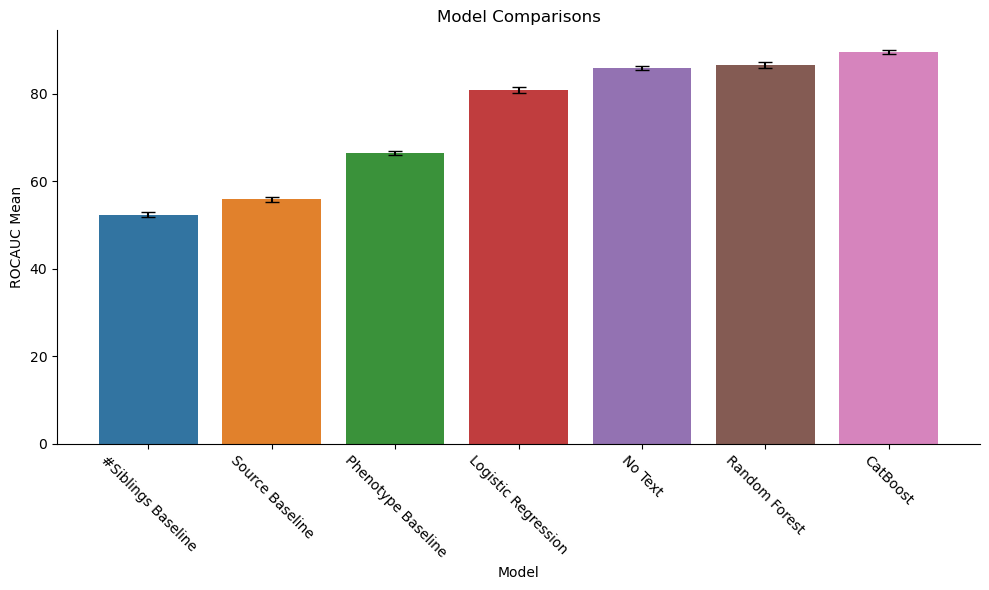

In [49]:
# Correcting the error bar/SD orientation and scale in the vertical bar plot

# Re-plotting with corrected settings
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(y='ROCAUC Mean', x='Model', data=rocauc_data, orient='v', capsize=0.1)#, palette='pastel')

# Adding error bars manually to fix the scale and orientation
for index, row in rocauc_data.iterrows():
    bar_plot.errorbar(x=index, y=row['ROCAUC Mean'], yerr=row['ROCAUC SD'], fmt='none', color='black', capsize=5)

# Adding title and labels
plt.title('Model Comparisons') # ROCAUC Scores with Standard Deviation (SD) for Different Models
plt.ylabel('ROCAUC Mean')
plt.xlabel('Model')

# Improving the precision of the ROCAUC axis
plt.xticks(rotation=-45)
# plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.1f}'))

# Enhancing plot aesthetics for professional appearance
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()


* to fix multiple error bars:

* https://stackoverflow.com/questions/72352491/how-to-plot-errorbars-on-seaborn-barplot

Alt ,maybe better code:
* https://stackoverflow.com/questions/75240070/how-can-custom-errorbars-be-aligned-on-grouped-bars

Warning: Plotted SD bars may have wrong order if not sorted? 

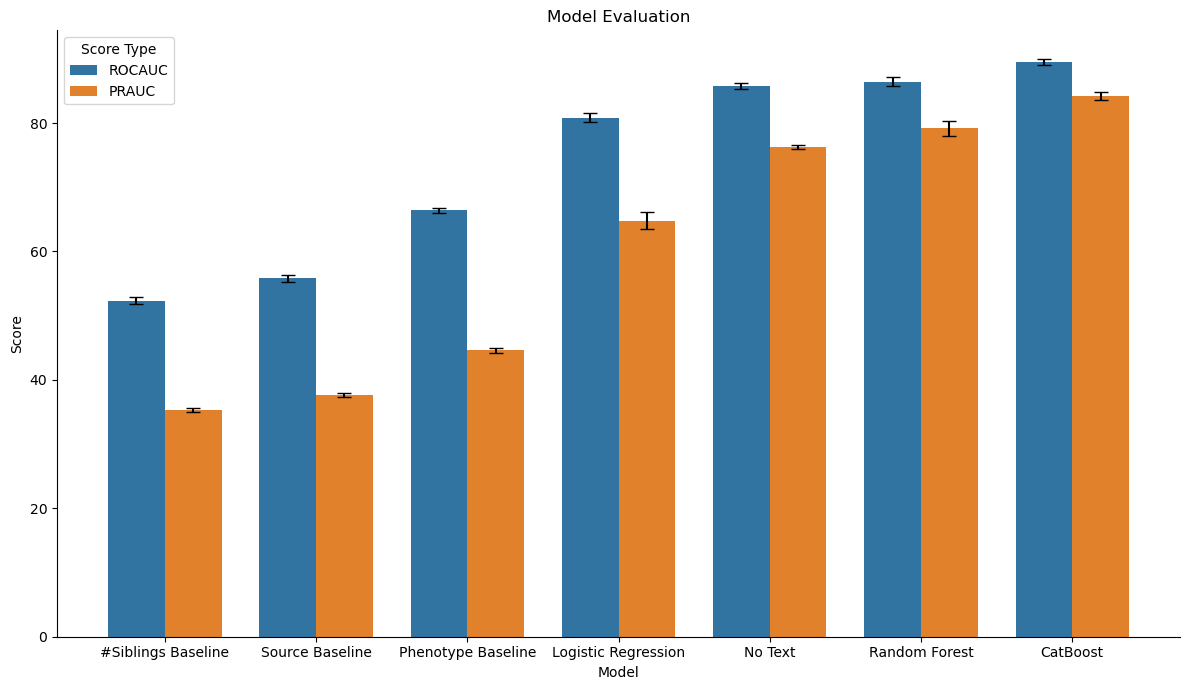

In [54]:
# Preparing data for plotting both ROCAUC and PRAUC with their respective SDs

# Extracting relevant columns for PRAUC
prauc_data = data[['Unnamed: 0', 'PRAUC Mean', 'PRAUC SD']].copy()
prauc_data.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)

# Merging ROCAUC and PRAUC data for plotting
merged_data = pd.melt(pd.concat([rocauc_data,prauc_data]), 
                      id_vars='Model', 
                      var_name='Score Type', 
                      value_vars=['ROCAUC Mean', 'ROCAUC SD', 'PRAUC Mean', 'PRAUC SD'])

merged_data["Score Type"] = merged_data["Score Type"].str.replace(" Mean","") # make score label prettier
# ## add:
## Warning: Plotted SD bars may have wrong order if not sorted?
# merged_data = merged_data.sort_values(["Model",'value']) # chang for err bars order - uncomment (maybe still have error?)

# Splitting the merged data into mean and SD for error bars
## add dropna
mean_data = merged_data[~merged_data['Score Type'].str.contains('SD')].dropna(axis=0).reset_index(drop=True)
sd_data = merged_data[merged_data['Score Type'].str.contains('SD')].dropna(axis=0).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x='Model', y='value', hue='Score Type', data=mean_data,width=0.75)#, palette='viridis')


# # Adding error bars manually
# for index, row in mean_data.drop_duplicates(subset="Model").iterrows():
#     # if 'ROCAUC' in row['Score Type']:
#     #     error = sd_data[(sd_data['Model'] == row['Model']) & (sd_data['Score Type'] == 'ROCAUC SD')]['value'].values[0]
#     #     bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='black', capsize=4)
#     # else:
#     #     error = sd_data[(sd_data['Model'] == row['Model']) & (sd_data['Score Type'] == 'PRAUC SD')]['value'].values[0]
#     #     bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='black', capsize=4)
#     # # bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='black', capsize=4) # orig

#     error = sd_data[(sd_data['Model'] == row['Model']) & (sd_data['Score Type'] == 'ROCAUC SD')]['value'].values[0]
#     bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='black', capsize=4)

#     error = sd_data[(sd_data['Model'] == row['Model']) & (sd_data['Score Type'] == 'PRAUC SD')]['value'].values[0]
#     bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='red', capsize=4)
# # bar_plot.errorbar(x=index, y=row['value'], yerr=error, fmt='none', color='black', capsize=4) # orig

ax = bar_plot
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches][0:14] # manual hack, other wise has 18? 
y_coords = [p.get_height() for p in ax.patches][0:14]
# error = sd_data[(sd_data['Model'] == row['Model']) & (sd_data['Score Type'] == 'ROCAUC SD')]['value'].values[0]
error = sd_data[sd_data['Score Type'].str.contains('SD')]['value']#.values[0]
ax.errorbar(x=x_coords, y=y_coords, yerr=error, fmt="none", c="k", capsize=5)

##for showing number in there
# for c in ax.containers:
#     # add labels to the bars
#     if type(c) == mpl.container.BarContainer:
#         labels=[f'{h:.2f}' if (h := v.get_height()) >= 0.01 else "<0.01" for v in c]

# Adjusting the plot
plt.title('Model Evaluation') # 'ROCAUC and PRAUC Scores for Different Models'
plt.ylabel('Score')
plt.xlabel('Model')

# plt.xticks(rotation=45)
plt.legend(title='Score Type')

# Enhancing plot aesthetics
sns.despine()
plt.tight_layout()

if SAVE_OUTPUTS:
    plt.savefig('./outputs/Fig-2-ModelsEval.png', dpi=900)
    
# Show the plot
plt.show()

In [51]:
# sd_data[sd_data['Score Type'].str.contains('SD')]

In [52]:
merged_data

,Model,Score Type,value
0,#Siblings Baseline,ROCAUC,52.35
1,Source Baseline,ROCAUC,55.86
2,Phenotype Baseline,ROCAUC,66.42
3,Logistic Regression,ROCAUC,80.83
4,No Text,ROCAUC,85.80
5,Random Forest,ROCAUC,86.45
6,CatBoost,ROCAUC,89.47
7,#Siblings Baseline,ROCAUC,NaN
8,Source Baseline,ROCAUC,NaN
9,Phenotype Baseline,ROCAUC,NaN


In [53]:
# import matplotlib as mpl
# import pandas as pd

# # set the index as the column to be the x-axis
# df = df.set_index('Parameter')

# # select the Mean data
# df_mean = df[df.Output.eq('Mean')]

# # specify the columns to use for the errors
# yerr = df_mean[['Total Error', 'First Error']]

# # the columns must be the same name as the columns used for the data values
# yerr.columns = ['Total-effect', 'First-order']

# # plot the selected data and add the yerr
# ax = df_mean.plot(kind='bar', y=['Total-effect', 'First-order'], yerr=yerr, rot=0, figsize=(12, 8), title='Average sensitivity across outputs')

# # iterate through each group of bars
# for c in ax.containers:
#     # add labels to the bars
#     if type(c) == mpl.container.BarContainer:
#         labels=[f'{h:.2f}' if (h := v.get_height()) >= 0.01 else "<0.01" for v in c]
#         ax.bar_label(c, labels=labels, label_type='center')